In [574]:
# check if libraries are installed
try:
    import numpy as np
    import pandas as pd
    import scipy
    import plotly.express as px
    from math import sqrt
    from matplotlib import pyplot as plt
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    from sklearn.datasets import make_classification
    from sklearn.manifold import TSNE
    print ("Imported all libraries successfully...")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} scipy
    !conda install --yes --prefix {sys.prefix} plotly
    !conda install --yes --prefix {sys.prefix} math
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} sklearn
    print ("Some libraries not found, installing...")

Imported all libraries successfully...


In [575]:
#create dataframe from csv of gun violence data
dataframe=pd.read_csv("shooting-1982-2023.csv")

In [576]:
pd.set_option("display.max_rows", 141)

In [577]:
dataframe

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Nashville religious school shooting,"Nashville, TN",3/27/2023,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,28,-,...,-,-,"semiautomatic rifle, semiautomatic handgun",-,-,"F (identified as transgender, per police)",-,-,Mass,2023
1,Michigan State University shooting,"East Lansing, Michigan",2/13/2023,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,-,...,yes,-,semiautomatic handguns,-,Black,M,-,-,Mass,2023
2,Half Moon Bay spree shooting,"Half Moon Bay, California",1/23/2023,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,-,...,-,-,semiautomatic handgun,-,Asian,M,-,-,Spree,2023
3,LA dance studio mass shooting,"Monterey Park, California",1/21/2023,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,yes,...,-,-,semiautomatic assault weapon (Details pending),-,Asian,M,-,-,Mass,2023
4,Virginia Walmart shooting,"Chesapeake, Virginia",11/22/2022,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,31,-,...,-,-,semiautomatic handgun,-,Black,M,-,-,Mass,2022
5,LGBTQ club shooting,"Colorado Springs, Colorado",11/19/2022,"Anderson L. Aldrich, 22, wore body armor and o...",5,25,30,Other,22,yes,...,-,-,semiautomatic rifle; semiautomatic handgun,-,White,M,-,-,Mass,2022
6,University of Virginia shooting,"Charlottesville, Virginia",11/13/2022,"Christopher Darnell Jones Jr., 22, allegedly o...",3,2,5,School,22,-,...,yes,"Dance's Sporting Goods; Colonial Heights, VA",semiautomatic pistol,Glock 45 9mm; Ruger AR-556 rifle (in his dorm ...,Black,M,-,-,Mass,2022
7,Raleigh spree shooting,"Hedingham, North Carolina",10/13/2022,"Austin Thompson, 15, went on a rampage in the ...",5,2,7,Other,15,-,...,-,-,"shotgun, semiautomatic handgun",NaN,White,M,-,-,Spree,2022
8,Greenwood Park Mall shooting,"Greenwood, Indiana",7/17/2022,"Jonathan Sapirman, 20, opened fire in a mall f...",3,2,5,workplace,20,-,...,yes,in Greenwood,semiautomatic rifles; semiautomatic handgun,Sig Sauer M400 rifle,White,M,-,-,Mass,2022
9,Highland Park July 4 parade shooting,"Highland Park, Illinois",7/4/2022,"Suspected gunman Robert ""Bobby"" Crimo, 21, all...",7,46,53,Other,21,-,...,yes,"legally purchased by the shooter in the ""great...",semiautomatic rifle,"AR-15 style rifle, possibly modified for rapid...",White,M,-,-,Mass,2022


In [578]:
#create a new column with state names
location = dataframe["location"]
state = []
for i in location:
    i = i.split(", ")
    i = i[1]
    if i == "TN":
        i = "Tennessee"
    state.append(i)
state = pd.Series(state)
dataframe.insert(loc=0, column='state', value=state)
dataframe

,state,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Tennessee,Nashville religious school shooting,"Nashville, TN",3/27/2023,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,28,...,-,-,"semiautomatic rifle, semiautomatic handgun",-,-,"F (identified as transgender, per police)",-,-,Mass,2023
1,Michigan,Michigan State University shooting,"East Lansing, Michigan",2/13/2023,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,...,yes,-,semiautomatic handguns,-,Black,M,-,-,Mass,2023
2,California,Half Moon Bay spree shooting,"Half Moon Bay, California",1/23/2023,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,...,-,-,semiautomatic handgun,-,Asian,M,-,-,Spree,2023
3,California,LA dance studio mass shooting,"Monterey Park, California",1/21/2023,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,...,-,-,semiautomatic assault weapon (Details pending),-,Asian,M,-,-,Mass,2023
4,Virginia,Virginia Walmart shooting,"Chesapeake, Virginia",11/22/2022,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,31,...,-,-,semiautomatic handgun,-,Black,M,-,-,Mass,2022
5,Colorado,LGBTQ club shooting,"Colorado Springs, Colorado",11/19/2022,"Anderson L. Aldrich, 22, wore body armor and o...",5,25,30,Other,22,...,-,-,semiautomatic rifle; semiautomatic handgun,-,White,M,-,-,Mass,2022
6,Virginia,University of Virginia shooting,"Charlottesville, Virginia",11/13/2022,"Christopher Darnell Jones Jr., 22, allegedly o...",3,2,5,School,22,...,yes,"Dance's Sporting Goods; Colonial Heights, VA",semiautomatic pistol,Glock 45 9mm; Ruger AR-556 rifle (in his dorm ...,Black,M,-,-,Mass,2022
7,North Carolina,Raleigh spree shooting,"Hedingham, North Carolina",10/13/2022,"Austin Thompson, 15, went on a rampage in the ...",5,2,7,Other,15,...,-,-,"shotgun, semiautomatic handgun",NaN,White,M,-,-,Spree,2022
8,Indiana,Greenwood Park Mall shooting,"Greenwood, Indiana",7/17/2022,"Jonathan Sapirman, 20, opened fire in a mall f...",3,2,5,workplace,20,...,yes,in Greenwood,semiautomatic rifles; semiautomatic handgun,Sig Sauer M400 rifle,White,M,-,-,Mass,2022
9,Illinois,Highland Park July 4 parade shooting,"Highland Park, Illinois",7/4/2022,"Suspected gunman Robert ""Bobby"" Crimo, 21, all...",7,46,53,Other,21,...,yes,"legally purchased by the shooter in the ""great...",semiautomatic rifle,"AR-15 style rifle, possibly modified for rapid...",White,M,-,-,Mass,2022


In [579]:
#transform state names into numerical data

#red states list
red = ["Idaho","Utah","Arizona","Montana","Wyoming","North Dakota","South Dakota","Kansas","Oklahoma","Texas","Louisiana", "Arkansas","Missouri","Alabama","Tennessee","Kentucky","Mississippi","Georgia","South Carolina","North Carolina","West Virginia","Alaska","Indiana","Lousiana","Nebraska"]
blue = ["Washington","Oregon","California","Nevada","Colorado","New Mexico","Wisconsin","Illinois","Michigan","Pennsylvania","New York","Vermont","New Hampshire","Maine","Massachusetts","Connecticut","Rhode Island","New Jersey", "Maryland","Delaware","Virginia", "Hawaii","D.C.","Minnesota"]
swing = ["Florida","Ohio","Iowa"]

count = 0
political_affiliation = []
for i in state:
    if i in red:
        factor = int(0)
        political_affiliation.append(factor)
    elif i in blue:
        factor = int(2)
        political_affiliation.append(factor)
    elif i in swing:
        factor = int(1)
        political_affiliation.append(factor)
    else:
        print(i)
    count = count + 1
    #print(i, factor, count)


In [580]:
political_affiliation = pd.Series(political_affiliation)
dataframe.insert(loc=0, column='political_affiliation', value=political_affiliation)

dataframe

,political_affiliation,state,case,location,date,summary,fatalities,injured,total_victims,location.1,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,0,Tennessee,Nashville religious school shooting,"Nashville, TN",3/27/2023,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,...,-,-,"semiautomatic rifle, semiautomatic handgun",-,-,"F (identified as transgender, per police)",-,-,Mass,2023
1,2,Michigan,Michigan State University shooting,"East Lansing, Michigan",2/13/2023,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,...,yes,-,semiautomatic handguns,-,Black,M,-,-,Mass,2023
2,2,California,Half Moon Bay spree shooting,"Half Moon Bay, California",1/23/2023,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,...,-,-,semiautomatic handgun,-,Asian,M,-,-,Spree,2023
3,2,California,LA dance studio mass shooting,"Monterey Park, California",1/21/2023,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,...,-,-,semiautomatic assault weapon (Details pending),-,Asian,M,-,-,Mass,2023
4,2,Virginia,Virginia Walmart shooting,"Chesapeake, Virginia",11/22/2022,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,...,-,-,semiautomatic handgun,-,Black,M,-,-,Mass,2022
5,2,Colorado,LGBTQ club shooting,"Colorado Springs, Colorado",11/19/2022,"Anderson L. Aldrich, 22, wore body armor and o...",5,25,30,Other,...,-,-,semiautomatic rifle; semiautomatic handgun,-,White,M,-,-,Mass,2022
6,2,Virginia,University of Virginia shooting,"Charlottesville, Virginia",11/13/2022,"Christopher Darnell Jones Jr., 22, allegedly o...",3,2,5,School,...,yes,"Dance's Sporting Goods; Colonial Heights, VA",semiautomatic pistol,Glock 45 9mm; Ruger AR-556 rifle (in his dorm ...,Black,M,-,-,Mass,2022
7,0,North Carolina,Raleigh spree shooting,"Hedingham, North Carolina",10/13/2022,"Austin Thompson, 15, went on a rampage in the ...",5,2,7,Other,...,-,-,"shotgun, semiautomatic handgun",NaN,White,M,-,-,Spree,2022
8,0,Indiana,Greenwood Park Mall shooting,"Greenwood, Indiana",7/17/2022,"Jonathan Sapirman, 20, opened fire in a mall f...",3,2,5,workplace,...,yes,in Greenwood,semiautomatic rifles; semiautomatic handgun,Sig Sauer M400 rifle,White,M,-,-,Mass,2022
9,2,Illinois,Highland Park July 4 parade shooting,"Highland Park, Illinois",7/4/2022,"Suspected gunman Robert ""Bobby"" Crimo, 21, all...",7,46,53,Other,...,yes,"legally purchased by the shooter in the ""great...",semiautomatic rifle,"AR-15 style rifle, possibly modified for rapid...",White,M,-,-,Mass,2022


In [581]:
#get descriptive stats for certain columns
age_stats = dataframe["age_of_shooter"].describe()
print(age_stats)

total_victims_stats = dataframe["total_victims"].describe()
print(total_victims_stats)

injured_stats = dataframe["injured"].describe()
print(injured_stats)

fatalities_stats = dataframe["fatalities"].describe()
print(fatalities_stats)

count    141.000000
mean      34.148936
std       13.178953
min       11.000000
25%       23.000000
50%       33.000000
75%       43.000000
max       72.000000
Name: age_of_shooter, dtype: float64
count    141.000000
mean      19.007092
std       51.747532
min        3.000000
25%        6.000000
50%       10.000000
75%       17.000000
max      604.000000
Name: total_victims, dtype: float64
count    141.000000
mean      11.205674
std       46.579505
min        0.000000
25%        1.000000
50%        3.000000
75%       10.000000
max      546.000000
Name: injured, dtype: float64
count    141.000000
mean       7.808511
std        7.463162
min        3.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       58.000000
Name: fatalities, dtype: float64


Text(0, 0.5, 'Frequency')

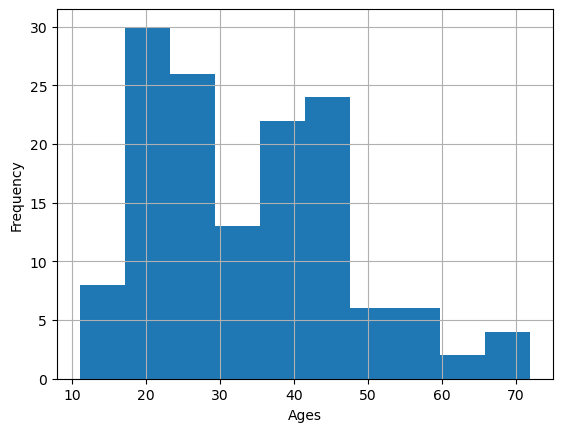

In [582]:
#plot histograms
dataframe["age_of_shooter"].hist(bins=10)
plt.xlabel('Ages')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

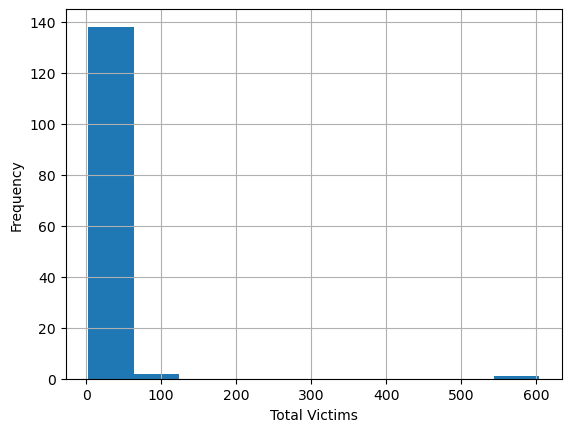

In [583]:
dataframe["total_victims"].hist(bins=10)
plt.xlabel('Total Victims')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

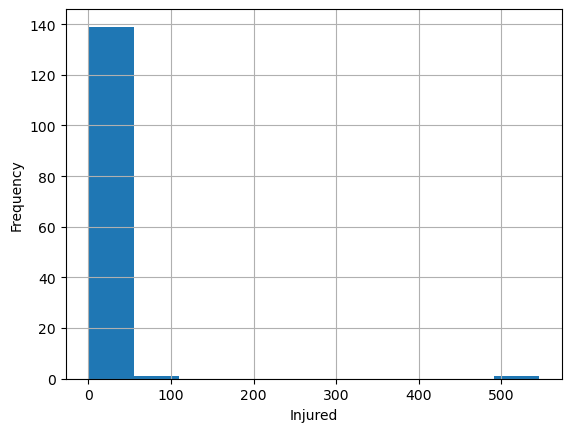

In [584]:
dataframe["injured"].hist(bins=10)
plt.xlabel('Injured')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

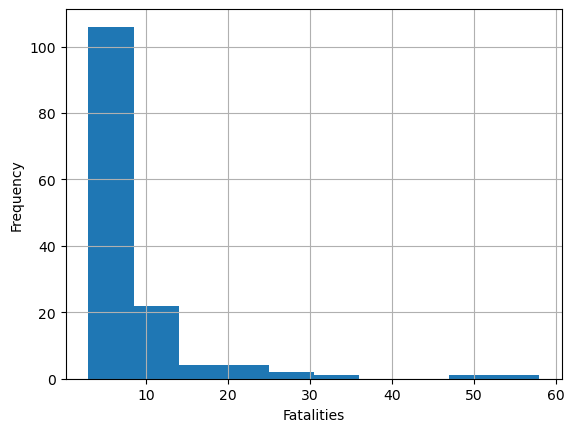

In [585]:
dataframe["fatalities"].hist(bins=10)
plt.xlabel('Fatalities')
plt.ylabel('Frequency')

In [586]:
red_df=dataframe.loc[dataframe["political_affiliation"]==0]
blue_df=dataframe.loc[dataframe["political_affiliation"]==2]
purple_df=dataframe.loc[dataframe["political_affiliation"]==1]

In [587]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=1, random_state=0, n_init=10)
kmeans_model.fit(red_df[["fatalities"]].to_numpy())
center = kmeans_model.cluster_centers_
print(center)
red_center=center[0][0]

[[8.07692308]]


In [588]:
kmeans_model = KMeans(n_clusters=1, random_state=0, n_init=10)
kmeans_model.fit(blue_df[["fatalities"]].to_numpy())
center = kmeans_model.cluster_centers_
print(center)
blue_center=center[0][0]

[[7.45882353]]


In [589]:
kmeans_model = KMeans(n_clusters=1, random_state=0, n_init=10)
kmeans_model.fit(purple_df[["fatalities"]].to_numpy())
center = kmeans_model.cluster_centers_
print(center)
purple_center=center[0][0]

[[8.94117647]]


In [590]:
kmeans_model = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_model.fit(dataframe[["fatalities"]].to_numpy())
center = kmeans_model.cluster_centers_
print(center)

[[ 5.9375    ]
 [21.27272727]
 [53.5       ]]


Text(0, 0.5, 'Fatalities')

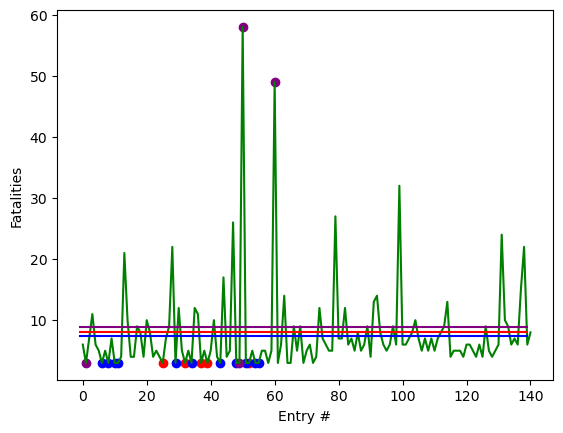

In [591]:
index = 0
distance_data = {}

for aff in dataframe["fatalities"]:
    distance1 = sqrt((aff - center[0])**2)
    distance2 = sqrt((aff - center[1])**2)
    distance3 = sqrt((aff - center[2])**2)
    sum_distance = distance1+distance2+distance3
    distance_data[index] = sum_distance
    index=index+1
# Sort the dictionary by value
sorted_X = []
sorted_Y = []
index_list=[]
for point in sorted(distance_data,key=distance_data.get,reverse=True):
    sorted_X.append(point)
    sorted_Y.append(dataframe["fatalities"][point])
    index_list.append(point)
#Take the top 5 values as anomalous and plot them
top_20_X=sorted_X[:20]
top_20_Y=sorted_Y[:20]
affiliations=[]
for index in index_list:
    affiliations.append(dataframe["political_affiliation"][index])
red_X=[]
red_Y=[]
blue_X=[]
blue_Y=[]
purple_X=[]
purple_Y=[]
for index in top_20_X:
    if affiliations[index]==0:
        red_X.append(index)
        red_Y.append(top_20_Y[top_20_X.index(index)])
    elif affiliations[index]==2:
        blue_X.append(index)
        blue_Y.append(top_20_Y[top_20_X.index(index)])
    elif affiliations[index]==1:
        purple_X.append(index)
        purple_Y.append(top_20_Y[top_20_X.index(index)])
# First plot the original data
pyplot.plot(range(len(dataframe["fatalities"])), dataframe["fatalities"], c="green")

# Then add a layer scatter plotting the anomalous points
pyplot.scatter(red_X,red_Y,c="red")
pyplot.scatter(blue_X,blue_Y,c="blue")
pyplot.scatter(purple_X,purple_Y,c="purple")
pyplot.plot(length_array,[red_center]*141,c="red")
pyplot.plot(length_array,[blue_center]*141,c="blue")
pyplot.plot(length_array,[purple_center]*141,c="purple")
pyplot.xlabel("Entry #")
pyplot.ylabel("Fatalities")

Text(0, 0.5, 'Fatalities')

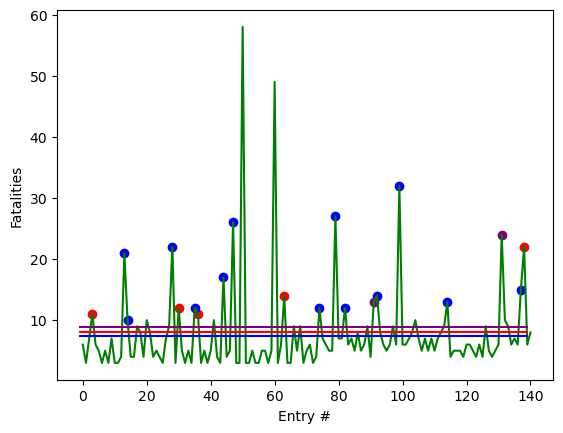

In [592]:
index = 0
distance_data = {}

for aff in dataframe["fatalities"]:
    distance1 = sqrt((aff - center[0])**2)
    distance2 = sqrt((aff - center[1])**2)
    distance3 = sqrt((aff - center[2])**2)
    sum_distance = distance1+distance2+distance3
    distance_data[index] = sum_distance
    index=index+1
# Sort the dictionary by value
sorted_X = []
sorted_Y = []
index_list=[]
for point in sorted(distance_data,key=distance_data.get,reverse=False):
    sorted_X.append(point)
    sorted_Y.append(dataframe["fatalities"][point])
    index_list.append(point)
#Take the top 5 values as anomalous and plot them
top_20_X=sorted_X[:20]
top_20_Y=sorted_Y[:20]
affiliations=[]
for index in index_list:
    affiliations.append(dataframe["political_affiliation"][index])
red_X=[]
red_Y=[]
blue_X=[]
blue_Y=[]
purple_X=[]
purple_Y=[]
for index in top_20_X:
    if affiliations[index]==0:
        red_X.append(index)
        red_Y.append(top_20_Y[top_20_X.index(index)])
    elif affiliations[index]==2:
        blue_X.append(index)
        blue_Y.append(top_20_Y[top_20_X.index(index)])
    elif affiliations[index]==1:
        purple_X.append(index)
        purple_Y.append(top_20_Y[top_20_X.index(index)])
# First plot the original data
pyplot.plot(range(len(dataframe["fatalities"])), dataframe["fatalities"], c="green")

# Then add a layer scatter plotting the anomalous points
pyplot.scatter(red_X,red_Y,c="red")
pyplot.scatter(blue_X,blue_Y,c="blue")
pyplot.scatter(purple_X,purple_Y,c="purple")
pyplot.plot(length_array,[red_center]*141,c="red")
pyplot.plot(length_array,[blue_center]*141,c="blue")
pyplot.plot(length_array,[purple_center]*141,c="purple")
pyplot.xlabel("Entry #")
pyplot.ylabel("Fatalities")

In [593]:
red_df=dataframe.loc[dataframe["political_affiliation"]==0]
blue_df=dataframe.loc[dataframe["political_affiliation"]==2]
purple_df=dataframe.loc[dataframe["political_affiliation"]==1]

In [594]:
red_age_fatalities_df=pd.DataFrame(data={"age_of_shooter":red_df["age_of_shooter"],"fatalities":red_df["fatalities"]})
blue_age_fatalities_df=pd.DataFrame(data={"age_of_shooter":blue_df["age_of_shooter"],"fatalities":blue_df["fatalities"]})
purple_age_fatalities_df=pd.DataFrame(data={"age_of_shooter":purple_df["age_of_shooter"],"fatalities":purple_df["fatalities"]})

In [595]:
kmeans_model = KMeans(n_clusters=1, random_state=0, n_init=10)
kmeans_model.fit(red_age_fatalities_df.to_numpy())
center = kmeans_model.cluster_centers_
print(center)
red_center_x=center[0][0]
red_center_y=center[0][1]

[[32.15384615  8.07692308]]


In [596]:
kmeans_model = KMeans(n_clusters=1, random_state=0, n_init=10)
kmeans_model.fit(blue_age_fatalities_df.to_numpy())
center = kmeans_model.cluster_centers_
print(center)
blue_center_x=center[0][0]
blue_center_y=center[0][1]

[[35.05882353  7.45882353]]


In [597]:
kmeans_model = KMeans(n_clusters=1, random_state=0, n_init=10)
kmeans_model.fit(purple_age_fatalities_df.to_numpy())
center = kmeans_model.cluster_centers_
print(center)
purple_center_x=center[0][0]
purple_center_y=center[0][1]

[[34.17647059  8.94117647]]


In [598]:
shooter_ages=dataframe["age_of_shooter"]
fatalities=dataframe["fatalities"]
age_fatalities_dataframe=pd.DataFrame(data={"age_of_shooter":shooter_ages,"fatalities":fatalities})
affiliations=dataframe["political_affiliation"]

In [599]:
age_fatalities_dataframe

,age_of_shooter,fatalities
0,28,6
1,43,3
2,67,7
3,72,11
4,31,6
5,22,5
6,22,3
7,15,5
8,20,3
9,21,7


In [600]:
kmeans_model = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_model.fit(age_fatalities_dataframe.to_numpy())

center = kmeans_model.cluster_centers_

print(center)
center1_x=center[0][0]
center1_y=center[0][1]
center2_x=center[1][0]
center2_y=center[1][1]
center3_x=center[2][0]
center3_y=center[2][1]
all_center_x=[center1_x,center2_x,center3_x]
all_center_y=[center1_y,center2_y,center3_y]

[[22.74626866  8.23880597]
 [59.86666667  9.66666667]
 [40.55932203  6.84745763]]


Text(0, 0.5, 'Fatalities')

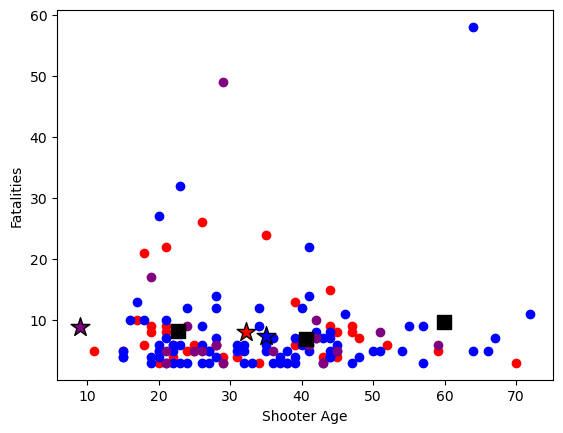

In [601]:
red_X=[]
red_Y=[]
blue_X=[]
blue_Y=[]
purple_X=[]
purple_Y=[]
for index in range(len(shooter_ages)):
    if affiliations[index]==0:
        red_X.append(shooter_ages[index])
        red_Y.append(fatalities[index])
    elif affiliations[index]==2:
        blue_X.append(shooter_ages[index])
        blue_Y.append(fatalities[index])
    elif affiliations[index]==1:
        purple_X.append(shooter_ages[index])
        purple_Y.append(fatalities[index])
pyplot.scatter(red_X,red_Y,c="red")
pyplot.scatter(blue_X,blue_Y,c="blue")
pyplot.scatter(purple_X,purple_Y,c="purple")
pyplot.scatter(red_center_x,red_center_y,c="red",marker="*",s=200,edgecolors="black")
pyplot.scatter(blue_center_x,blue_center_y,c="blue",marker="*",s=200,edgecolors="black")
pyplot.scatter(purple_center_y,purple_center_y,c="purple",marker="*",s=200,edgecolors="black")
pyplot.scatter(all_center_x,all_center_y,c="black",marker="s",s=100)
pyplot.xlabel("Shooter Age")
pyplot.ylabel("Fatalities")

Text(0, 0.5, 'Fatalities')

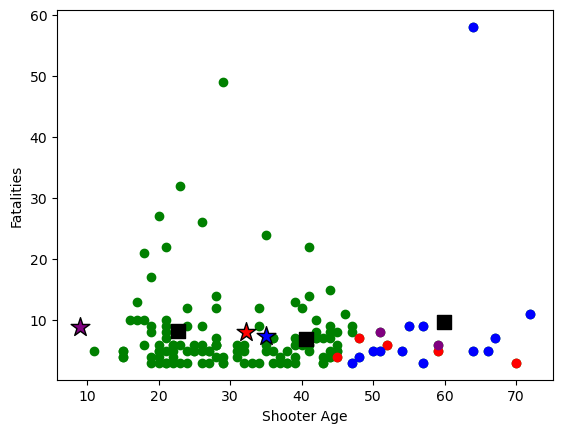

In [602]:
index = 0
distance_data = {}
age_of_shooter=age_fatalities_dataframe["age_of_shooter"]
for aff in age_fatalities_dataframe["fatalities"]:
    aff=float(aff)
    aff2=age_of_shooter[index]
    aff2=float(aff2)
    distance1 = sqrt(((aff - center[0][0])**2)+((aff2-center[0][1])**2))
    distance2 = sqrt(((aff - center[1][0])**2)+((aff2-center[1][1])**2))
    distance3 = sqrt(((aff - center[2][0])**2)+((aff2-center[2][1])**2))
    sum_distance = distance1+distance2+distance3
    distance_data[index] = sum_distance
    index=index+1
# Sort the dictionary by value
sorted_X = []
sorted_Y = []
index_list=[]
for point in sorted(distance_data,key=distance_data.get,reverse=True):
    sorted_X.append(age_fatalities_dataframe["age_of_shooter"][point])
    sorted_Y.append(age_fatalities_dataframe["fatalities"][point])
    index_list.append(point)
#Take the top 5 values as anomalous and plot them
top_20_X=sorted_X[:20]
top_20_Y=sorted_Y[:20]
affiliations=[]
for index in index_list:
    affiliations.append(dataframe["political_affiliation"][index])
red_X=[]
red_Y=[]
blue_X=[]
blue_Y=[]
purple_X=[]
purple_Y=[]
for index in range(len(top_20_X)):
    if affiliations[index]==0:
        red_X.append(top_20_X[index])
        red_Y.append(top_20_Y[index])
    elif affiliations[index]==2:
        blue_X.append(top_20_X[index])
        blue_Y.append(top_20_Y[index])
    elif affiliations[index]==1:
        purple_X.append(top_20_X[index])
        purple_Y.append(top_20_Y[index])
# First plot the original data
pyplot.scatter(age_fatalities_dataframe["age_of_shooter"], age_fatalities_dataframe["fatalities"], c="green")

# Then add a layer scatter plotting the anomalous points
pyplot.scatter(red_X,red_Y,c="red")
pyplot.scatter(blue_X,blue_Y,c="blue")
pyplot.scatter(purple_X,purple_Y,c="purple")
pyplot.scatter(red_center_x,red_center_y,c="red",marker="*",s=200,edgecolors="black")
pyplot.scatter(blue_center_x,blue_center_y,c="blue",marker="*",s=200,edgecolors="black")
pyplot.scatter(purple_center_y,purple_center_y,c="purple",marker="*",s=200,edgecolors="black")
pyplot.scatter(all_center_x,all_center_y,c="black",marker="s",s=100)
pyplot.xlabel("Shooter Age")
pyplot.ylabel("Fatalities")

Text(0, 0.5, 'Fatalities')

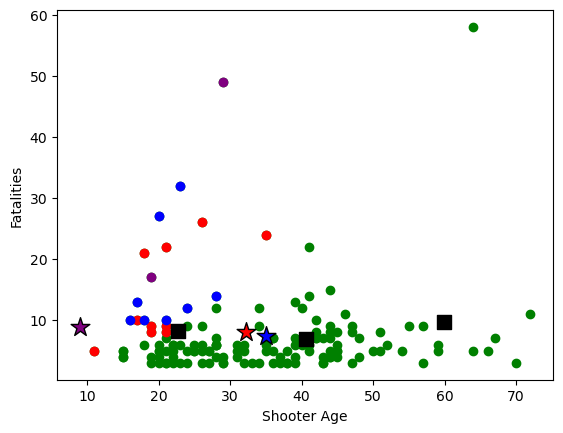

In [603]:
index = 0
distance_data = {}
age_of_shooter=age_fatalities_dataframe["age_of_shooter"]
for aff in age_fatalities_dataframe["fatalities"]:
    aff=float(aff)
    aff2=age_of_shooter[index]
    aff2=float(aff2)
    distance1 = sqrt(((aff - center[0][0])**2)+((aff2-center[0][1])**2))
    distance2 = sqrt(((aff - center[1][0])**2)+((aff2-center[1][1])**2))
    distance3 = sqrt(((aff - center[2][0])**2)+((aff2-center[2][1])**2))
    sum_distance = distance1+distance2+distance3
    distance_data[index] = sum_distance
    index=index+1
# Sort the dictionary by value
sorted_X = []
sorted_Y = []
index_list=[]
for point in sorted(distance_data,key=distance_data.get,reverse=False):
    sorted_X.append(age_fatalities_dataframe["age_of_shooter"][point])
    sorted_Y.append(age_fatalities_dataframe["fatalities"][point])
    index_list.append(point)
#Take the top 5 values as anomalous and plot them
top_20_X=sorted_X[:20]
top_20_Y=sorted_Y[:20]
affiliations=[]
for index in index_list:
    affiliations.append(dataframe["political_affiliation"][index])
red_X=[]
red_Y=[]
blue_X=[]
blue_Y=[]
purple_X=[]
purple_Y=[]
for index in range(len(top_20_X)):
    if affiliations[index]==0:
        red_X.append(top_20_X[index])
        red_Y.append(top_20_Y[index])
    elif affiliations[index]==2:
        blue_X.append(top_20_X[index])
        blue_Y.append(top_20_Y[index])
    elif affiliations[index]==1:
        purple_X.append(top_20_X[index])
        purple_Y.append(top_20_Y[index])
# First plot the original data
pyplot.scatter(age_fatalities_dataframe["age_of_shooter"], age_fatalities_dataframe["fatalities"], c="green")

# Then add a layer scatter plotting the anomalous points
pyplot.scatter(red_X,red_Y,c="red")
pyplot.scatter(blue_X,blue_Y,c="blue")
pyplot.scatter(purple_X,purple_Y,c="purple")
pyplot.scatter(red_center_x,red_center_y,c="red",marker="*",s=200,edgecolors="black")
pyplot.scatter(blue_center_x,blue_center_y,c="blue",marker="*",s=200,edgecolors="black")
pyplot.scatter(purple_center_y,purple_center_y,c="purple",marker="*",s=200,edgecolors="black")
pyplot.scatter(all_center_x,all_center_y,c="black",marker="s",s=100)
pyplot.xlabel("Shooter Age")
pyplot.ylabel("Fatalities")

In [604]:
state_dict=dict.fromkeys(dataframe["state"])
state_dict["Tennessee"]=7.134327
state_dict["Michigan"]=10.030722
state_dict["California"]=38.915693
state_dict["Virginia"]=8.709873
state_dict["Colorado"]=5.868555
state_dict["North Carolina"]=10.832061
state_dict["Indiana"]=6.852542
state_dict["Illinois"]=12.477595
state_dict["Alabama"]=5.098746
state_dict["Maryland"]=6.154710
state_dict["Oklahoma"]=4.048375
state_dict["Texas"]=30.500280
state_dict["New York"]=19.496810
state_dict["Georgia"]=11.037723
state_dict["Missouri"]=6.186091
state_dict["Wisconsin"]=5.904977
state_dict["New Jersey"]=9.255437
state_dict["Florida"]=22.661577
state_dict["Ohio"]=11.747774
state_dict["Pennsylvania"]=12.931957
state_dict["Nevada"]=3.209142
state_dict["Washington"]=7.830827
state_dict["Lousiana"]=4.553384
state_dict["Louisiana"]=4.553384
state_dict["Kansas"]=2.936378
state_dict["Oregon"]=4.223973
state_dict["South Carolina"]=5.372002
state_dict["D.C."]=.631693
state_dict["Connecticut"]=3.692055
state_dict["Minnesota"]=5.722897
state_dict["Arizona"]=7.453517
state_dict["Kentucky"]=4.518031
state_dict["Nebraska"]=1.972292
state_dict["Utah"]=3.422487
state_dict["Mississippi"]=2.930528
state_dict["Massachusetts"]=6.974258
state_dict["Hawaii"]=1.433238
state_dict["Arkansas"]=3.063152
state_dict["Iowa"]=3.203345
state_dict

{'Tennessee': 7.134327,
 'Michigan': 10.030722,
 'California': 38.915693,
 'Virginia': 8.709873,
 'Colorado': 5.868555,
 'North Carolina': 10.832061,
 'Indiana': 6.852542,
 'Illinois': 12.477595,
 'Alabama': 5.098746,
 'Maryland': 6.15471,
 'Oklahoma': 4.048375,
 'Texas': 30.50028,
 'New York': 19.49681,
 'Georgia': 11.037723,
 'Missouri': 6.186091,
 'Wisconsin': 5.904977,
 'New Jersey': 9.255437,
 'Florida': 22.661577,
 'Ohio': 11.747774,
 'Pennsylvania': 12.931957,
 'Nevada': 3.209142,
 'Washington': 7.830827,
 'Lousiana': 4.553384,
 'Kansas': 2.936378,
 'Oregon': 4.223973,
 'South Carolina': 5.372002,
 'D.C.': 0.631693,
 'Connecticut': 3.692055,
 'Minnesota': 5.722897,
 'Arizona': 7.453517,
 'Kentucky': 4.518031,
 'Nebraska': 1.972292,
 'Utah': 3.422487,
 'Mississippi': 2.930528,
 'Massachusetts': 6.974258,
 'Hawaii': 1.433238,
 'Arkansas': 3.063152,
 'Iowa': 3.203345,
 'Louisiana': 4.553384}

In [605]:
states=dataframe["state"]
states_populations=[]
for state in states:
    states_populations.append(state_dict[state])
dataframe.insert(loc=0,column="state_population",value=states_populations)
dataframe

,state_population,political_affiliation,state,case,location,date,summary,fatalities,injured,total_victims,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,7.134327,0,Tennessee,Nashville religious school shooting,"Nashville, TN",3/27/2023,"Audrey Hale, 28, who was a former student at t...",6,1,6,...,-,-,"semiautomatic rifle, semiautomatic handgun",-,-,"F (identified as transgender, per police)",-,-,Mass,2023
1,10.030722,2,Michigan,Michigan State University shooting,"East Lansing, Michigan",2/13/2023,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,...,yes,-,semiautomatic handguns,-,Black,M,-,-,Mass,2023
2,38.915693,2,California,Half Moon Bay spree shooting,"Half Moon Bay, California",1/23/2023,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,...,-,-,semiautomatic handgun,-,Asian,M,-,-,Spree,2023
3,38.915693,2,California,LA dance studio mass shooting,"Monterey Park, California",1/21/2023,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,...,-,-,semiautomatic assault weapon (Details pending),-,Asian,M,-,-,Mass,2023
4,8.709873,2,Virginia,Virginia Walmart shooting,"Chesapeake, Virginia",11/22/2022,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,...,-,-,semiautomatic handgun,-,Black,M,-,-,Mass,2022
5,5.868555,2,Colorado,LGBTQ club shooting,"Colorado Springs, Colorado",11/19/2022,"Anderson L. Aldrich, 22, wore body armor and o...",5,25,30,...,-,-,semiautomatic rifle; semiautomatic handgun,-,White,M,-,-,Mass,2022
6,8.709873,2,Virginia,University of Virginia shooting,"Charlottesville, Virginia",11/13/2022,"Christopher Darnell Jones Jr., 22, allegedly o...",3,2,5,...,yes,"Dance's Sporting Goods; Colonial Heights, VA",semiautomatic pistol,Glock 45 9mm; Ruger AR-556 rifle (in his dorm ...,Black,M,-,-,Mass,2022
7,10.832061,0,North Carolina,Raleigh spree shooting,"Hedingham, North Carolina",10/13/2022,"Austin Thompson, 15, went on a rampage in the ...",5,2,7,...,-,-,"shotgun, semiautomatic handgun",NaN,White,M,-,-,Spree,2022
8,6.852542,0,Indiana,Greenwood Park Mall shooting,"Greenwood, Indiana",7/17/2022,"Jonathan Sapirman, 20, opened fire in a mall f...",3,2,5,...,yes,in Greenwood,semiautomatic rifles; semiautomatic handgun,Sig Sauer M400 rifle,White,M,-,-,Mass,2022
9,12.477595,2,Illinois,Highland Park July 4 parade shooting,"Highland Park, Illinois",7/4/2022,"Suspected gunman Robert ""Bobby"" Crimo, 21, all...",7,46,53,...,yes,"legally purchased by the shooter in the ""great...",semiautomatic rifle,"AR-15 style rifle, possibly modified for rapid...",White,M,-,-,Mass,2022


In [606]:
states_populations=dataframe["state_population"]
fatalities=dataframe["fatalities"]
population_fatalities_df=pd.DataFrame(data={"state_population":states_populations,"fatalities":fatalities})
affiliations=dataframe["political_affiliation"]
population_fatalities_df

,state_population,fatalities
0,7.134327,6
1,10.030722,3
2,38.915693,7
3,38.915693,11
4,8.709873,6
5,5.868555,5
6,8.709873,3
7,10.832061,5
8,6.852542,3
9,12.477595,7


In [607]:
red_df=dataframe.loc[dataframe["political_affiliation"]==0]
blue_df=dataframe.loc[dataframe["political_affiliation"]==2]
purple_df=dataframe.loc[dataframe["political_affiliation"]==1]

In [608]:
red_pop_fatalities_df=pd.DataFrame(data={"state_population":red_df["state_population"],"fatalities":red_df["fatalities"]})
blue_pop_fatalities_df=pd.DataFrame(data={"state_population":blue_df["state_population"],"fatalities":blue_df["fatalities"]})
purple_pop_fatalities_df=pd.DataFrame(data={"state_population":purple_df["state_population"],"fatalities":purple_df["fatalities"]})

In [609]:
kmeans_model = KMeans(n_clusters=1, random_state=0, n_init=10)
kmeans_model.fit(red_age_fatalities_df.to_numpy())
center = kmeans_model.cluster_centers_
print(center)
red_center_x=center[0][0]
red_center_y=center[0][1]

[[32.15384615  8.07692308]]


In [610]:
kmeans_model = KMeans(n_clusters=1, random_state=0, n_init=10)
kmeans_model.fit(blue_age_fatalities_df.to_numpy())
center = kmeans_model.cluster_centers_
print(center)
blue_center_x=center[0][0]
blue_center_y=center[0][1]

[[35.05882353  7.45882353]]


In [611]:
kmeans_model = KMeans(n_clusters=1, random_state=0, n_init=10)
kmeans_model.fit(purple_age_fatalities_df.to_numpy())
center = kmeans_model.cluster_centers_
print(center)
purple_center_x=center[0][0]
purple_center_y=center[0][1]

[[34.17647059  8.94117647]]


In [612]:
kmeans_model = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_model.fit(population_fatalities_df.to_numpy())

center = kmeans_model.cluster_centers_

print(center)
center1_x=center[0][0]
center1_y=center[0][1]
center2_x=center[1][0]
center2_y=center[1][1]
center3_x=center[2][0]
center3_y=center[2][1]
all_center_x=[center1_x,center2_x,center3_x]
all_center_y=[center1_y,center2_y,center3_y]

[[ 8.06814864  5.97752809]
 [33.08693817  8.39583333]
 [ 9.56816175 41.5       ]]


Text(0, 0.5, 'Fatalities')

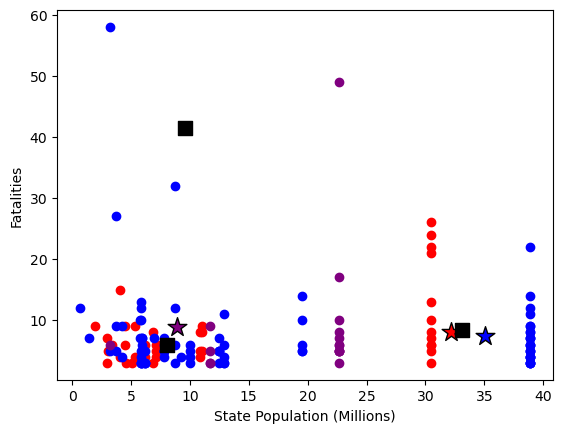

In [613]:
red_X=[]
red_Y=[]
blue_X=[]
blue_Y=[]
purple_X=[]
purple_Y=[]
for index in range(len(states_populations)):
    if affiliations[index]==0:
        red_X.append(states_populations[index])
        red_Y.append(fatalities[index])
    elif affiliations[index]==2:
        blue_X.append(states_populations[index])
        blue_Y.append(fatalities[index])
    elif affiliations[index]==1:
        purple_X.append(states_populations[index])
        purple_Y.append(fatalities[index])
pyplot.scatter(red_X,red_Y,c="red")
pyplot.scatter(blue_X,blue_Y,c="blue")
pyplot.scatter(purple_X,purple_Y,c="purple")
pyplot.scatter(red_center_x,red_center_y,c="red",marker="*",s=200,edgecolors="black")
pyplot.scatter(blue_center_x,blue_center_y,c="blue",marker="*",s=200,edgecolors="black")
pyplot.scatter(purple_center_y,purple_center_y,c="purple",marker="*",s=200,edgecolors="black")
pyplot.scatter(all_center_x,all_center_y,c="black",marker="s",s=100)
pyplot.xlabel("State Population (Millions)")
pyplot.ylabel("Fatalities")

Text(0, 0.5, 'Fatalities')

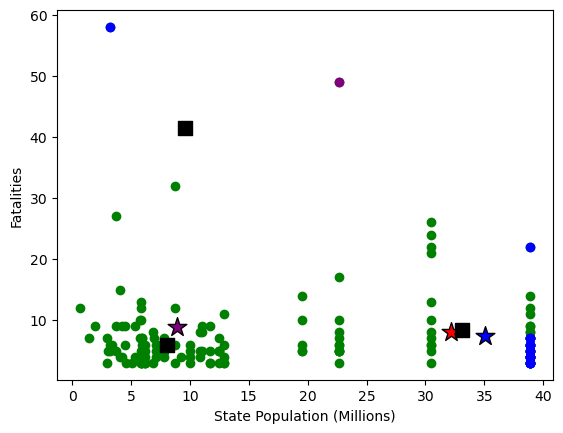

In [614]:
index = 0
distance_data = {}
states_populations=dataframe["state_population"]
for aff in dataframe["fatalities"]:
    aff=float(aff)
    aff2=states_populations[index]
    aff2=float(aff2)
    distance1 = sqrt(((aff - center[0][0])**2)+((aff2-center[0][1])**2))
    distance2 = sqrt(((aff - center[1][0])**2)+((aff2-center[1][1])**2))
    distance3 = sqrt(((aff - center[2][0])**2)+((aff2-center[2][1])**2))
    sum_distance = distance1+distance2+distance3
    distance_data[index] = sum_distance
    index=index+1
# Sort the dictionary by value
sorted_X = []
sorted_Y = []
index_list=[]
for point in sorted(distance_data,key=distance_data.get,reverse=True):
    sorted_X.append(dataframe["state_population"][point])
    sorted_Y.append(dataframe["fatalities"][point])
    index_list.append(point)
#Take the top 5 values as anomalous and plot them
top_20_X=sorted_X[:20]
top_20_Y=sorted_Y[:20]
affiliations=[]
for index in index_list:
    affiliations.append(dataframe["political_affiliation"][index])
red_X=[]
red_Y=[]
blue_X=[]
blue_Y=[]
purple_X=[]
purple_Y=[]
for index in range(len(top_20_X)):
    if affiliations[index]==0:
        red_X.append(top_20_X[index])
        red_Y.append(top_20_Y[index])
    elif affiliations[index]==2:
        blue_X.append(top_20_X[index])
        blue_Y.append(top_20_Y[index])
    elif affiliations[index]==1:
        purple_X.append(top_20_X[index])
        purple_Y.append(top_20_Y[index])
# First plot the original data
pyplot.scatter(dataframe["state_population"], dataframe["fatalities"], c="green")

# Then add a layer scatter plotting the anomalous points
pyplot.scatter(red_X,red_Y,c="red")
pyplot.scatter(blue_X,blue_Y,c="blue")
pyplot.scatter(purple_X,purple_Y,c="purple")
pyplot.scatter(red_center_x,red_center_y,c="red",marker="*",s=200,edgecolors="black")
pyplot.scatter(blue_center_x,blue_center_y,c="blue",marker="*",s=200,edgecolors="black")
pyplot.scatter(purple_center_y,purple_center_y,c="purple",marker="*",s=200,edgecolors="black")
pyplot.scatter(all_center_x,all_center_y,c="black",marker="s",s=100)
pyplot.xlabel("State Population (Millions)")
pyplot.ylabel("Fatalities")

Text(0, 0.5, 'Fatalities')

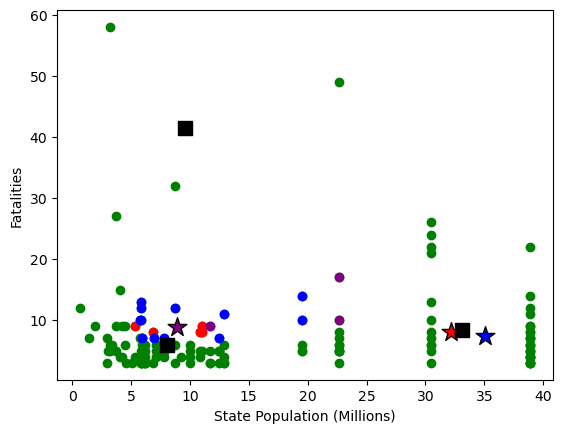

In [615]:
index = 0
distance_data = {}
states_populations=dataframe["state_population"]
for aff in dataframe["fatalities"]:
    aff=float(aff)
    aff2=states_populations[index]
    aff2=float(aff2)
    distance1 = sqrt(((aff - center[0][0])**2)+((aff2-center[0][1])**2))
    distance2 = sqrt(((aff - center[1][0])**2)+((aff2-center[1][1])**2))
    distance3 = sqrt(((aff - center[2][0])**2)+((aff2-center[2][1])**2))
    sum_distance = distance1+distance2+distance3
    distance_data[index] = sum_distance
    index=index+1
# Sort the dictionary by value
sorted_X = []
sorted_Y = []
index_list=[]
for point in sorted(distance_data,key=distance_data.get,reverse=False):
    sorted_X.append(dataframe["state_population"][point])
    sorted_Y.append(dataframe["fatalities"][point])
    index_list.append(point)
#Take the top 5 values as anomalous and plot them
top_20_X=sorted_X[:20]
top_20_Y=sorted_Y[:20]
affiliations=[]
for index in index_list:
    affiliations.append(dataframe["political_affiliation"][index])
red_X=[]
red_Y=[]
blue_X=[]
blue_Y=[]
purple_X=[]
purple_Y=[]
for index in range(len(top_20_X)):
    if affiliations[index]==0:
        red_X.append(top_20_X[index])
        red_Y.append(top_20_Y[index])
    elif affiliations[index]==2:
        blue_X.append(top_20_X[index])
        blue_Y.append(top_20_Y[index])
    elif affiliations[index]==1:
        purple_X.append(top_20_X[index])
        purple_Y.append(top_20_Y[index])
# First plot the original data
pyplot.scatter(dataframe["state_population"], dataframe["fatalities"], c="green")

# Then add a layer scatter plotting the anomalous points
pyplot.scatter(red_X,red_Y,c="red")
pyplot.scatter(blue_X,blue_Y,c="blue")
pyplot.scatter(purple_X,purple_Y,c="purple")
pyplot.scatter(red_center_x,red_center_y,c="red",marker="*",s=200,edgecolors="black")
pyplot.scatter(blue_center_x,blue_center_y,c="blue",marker="*",s=200,edgecolors="black")
pyplot.scatter(purple_center_y,purple_center_y,c="purple",marker="*",s=200,edgecolors="black")
pyplot.scatter(all_center_x,all_center_y,c="black",marker="s",s=100)
pyplot.xlabel("State Population (Millions)")
pyplot.ylabel("Fatalities")

In [616]:
gender = dataframe["gender"]
genderz = []
#Male = 0 Female = 1
for i in gender:
    if "F" in i:
        genderz.append(1)
    else:
        genderz.append(0)
genderz = pd.Series(genderz)
dataframe.insert(loc=0, column='genderz', value=genderz)
dataframe

,genderz,state_population,political_affiliation,state,case,location,date,summary,fatalities,injured,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,1,7.134327,0,Tennessee,Nashville religious school shooting,"Nashville, TN",3/27/2023,"Audrey Hale, 28, who was a former student at t...",6,1,...,-,-,"semiautomatic rifle, semiautomatic handgun",-,-,"F (identified as transgender, per police)",-,-,Mass,2023
1,0,10.030722,2,Michigan,Michigan State University shooting,"East Lansing, Michigan",2/13/2023,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,...,yes,-,semiautomatic handguns,-,Black,M,-,-,Mass,2023
2,0,38.915693,2,California,Half Moon Bay spree shooting,"Half Moon Bay, California",1/23/2023,"Chunli Zhao, 67, suspected of carrying out the...",7,1,...,-,-,semiautomatic handgun,-,Asian,M,-,-,Spree,2023
3,0,38.915693,2,California,LA dance studio mass shooting,"Monterey Park, California",1/21/2023,"Huu Can Tran, 72, fled the scene in a white va...",11,10,...,-,-,semiautomatic assault weapon (Details pending),-,Asian,M,-,-,Mass,2023
4,0,8.709873,2,Virginia,Virginia Walmart shooting,"Chesapeake, Virginia",11/22/2022,"Andre Bing, 31, who worked as a supervisor at ...",6,6,...,-,-,semiautomatic handgun,-,Black,M,-,-,Mass,2022
5,0,5.868555,2,Colorado,LGBTQ club shooting,"Colorado Springs, Colorado",11/19/2022,"Anderson L. Aldrich, 22, wore body armor and o...",5,25,...,-,-,semiautomatic rifle; semiautomatic handgun,-,White,M,-,-,Mass,2022
6,0,8.709873,2,Virginia,University of Virginia shooting,"Charlottesville, Virginia",11/13/2022,"Christopher Darnell Jones Jr., 22, allegedly o...",3,2,...,yes,"Dance's Sporting Goods; Colonial Heights, VA",semiautomatic pistol,Glock 45 9mm; Ruger AR-556 rifle (in his dorm ...,Black,M,-,-,Mass,2022
7,0,10.832061,0,North Carolina,Raleigh spree shooting,"Hedingham, North Carolina",10/13/2022,"Austin Thompson, 15, went on a rampage in the ...",5,2,...,-,-,"shotgun, semiautomatic handgun",NaN,White,M,-,-,Spree,2022
8,0,6.852542,0,Indiana,Greenwood Park Mall shooting,"Greenwood, Indiana",7/17/2022,"Jonathan Sapirman, 20, opened fire in a mall f...",3,2,...,yes,in Greenwood,semiautomatic rifles; semiautomatic handgun,Sig Sauer M400 rifle,White,M,-,-,Mass,2022
9,0,12.477595,2,Illinois,Highland Park July 4 parade shooting,"Highland Park, Illinois",7/4/2022,"Suspected gunman Robert ""Bobby"" Crimo, 21, all...",7,46,...,yes,"legally purchased by the shooter in the ""great...",semiautomatic rifle,"AR-15 style rifle, possibly modified for rapid...",White,M,-,-,Mass,2022


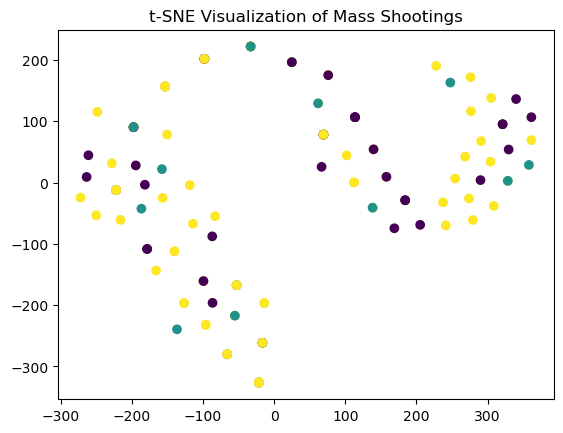

In [617]:
features = ['total_victims', 'genderz']

# Define the target variable
target = 'political_affiliation'

# Preprocess the data (e.g. normalize or scale)

# Run the t-SNE algorithm
tsne = TSNE(n_components=2, random_state=0)
X = dataframe[features]
y = dataframe[target]
X_tsne = tsne.fit_transform(X)

# Visualize the results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title('t-SNE Visualization of Mass Shootings')
plt.show()

In [618]:
kmeans_model = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_model.fit(dataframe[["fatalities"]].to_numpy())

center = kmeans_model.cluster_centers_

print(center)

[[ 5.9375    ]
 [21.27272727]
 [53.5       ]]


In [619]:
pca = PCA(2)

# transform the data
df = pd.DataFrame()
df.insert(loc=0, column='fatalities', value=dataframe["fatalities"])
df.insert(loc=1, column='political_affiliation', value=dataframe["political_affiliation"])

df = pca.fit_transform(df)

df.shape

(141, 2)

In [620]:
kmeans = KMeans(n_clusters = 3)

label = kmeans.fit_predict(df)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0]


/Users/agnaeyaarora/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



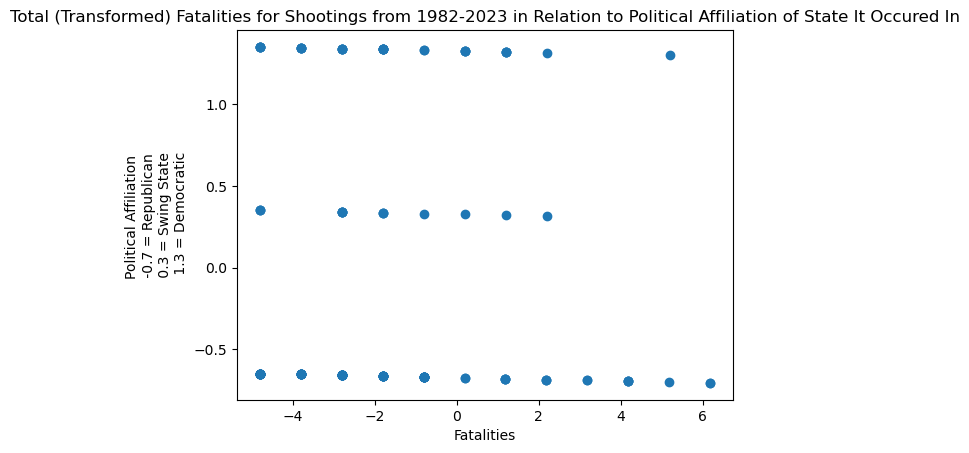

In [621]:
#filter rows of original data
filtered_label0 = df[label == 0]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])

plt.title("Total (Transformed) Fatalities for Shootings from 1982-2023 in Relation to Political Affiliation of State It Occured In")
plt.xlabel("Fatalities")
plt.ylabel("Political Affiliation \n -0.7 = Republican \n 0.3 = Swing State \n 1.3 = Democratic")

plt.show()

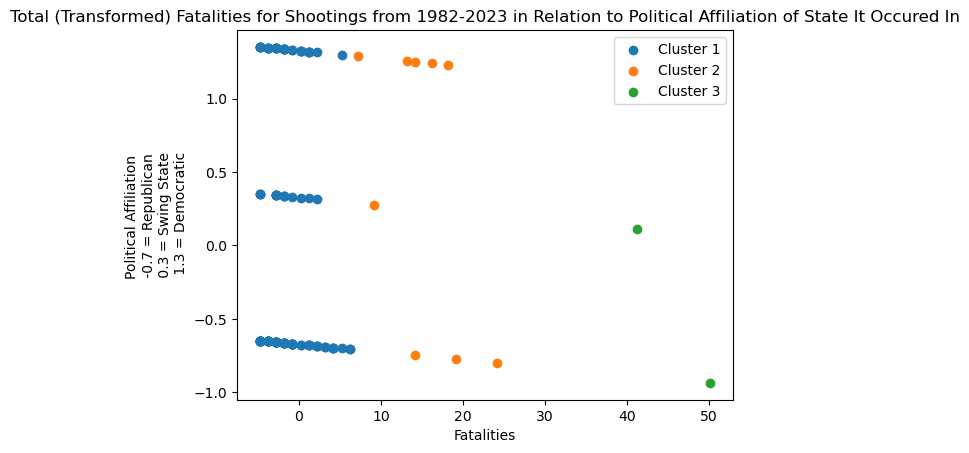

In [622]:
#plotting the results:

plt.scatter(df[label == 0, 0], df[label == 0, 1], label = "Cluster 1")
plt.scatter(df[label == 1, 0], df[label == 1, 1], label = "Cluster 2")
plt.scatter(df[label == 2, 0], df[label == 2, 1], label = "Cluster 3")

plt.legend()

plt.title("Total (Transformed) Fatalities for Shootings from 1982-2023 in Relation to Political Affiliation of State It Occured In")
plt.xlabel("Fatalities")
plt.ylabel("Political Affiliation \n -0.7 = Republican \n 0.3 = Swing State \n 1.3 = Democratic")

plt.show()

In [623]:
temp = pd.DataFrame()
temp.insert(loc=0, column='fatalities', value=dataframe["fatalities"])
temp.insert(loc=1, column='total_victims', value=dataframe["total_victims"])
temp.insert(loc=2, column='age_of_shooter', value=dataframe["age_of_shooter"])

X = temp.to_numpy()

y = np.array(dataframe["political_affiliation"])

In [624]:
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, color_continuous_scale='Bluered_r', opacity=0.8,
                   title="Fatalities, Total Victims, and Age of Shooter for Shootings from 1982-2023", 
                   labels={'x': 'Fatalities', 'y':'Total Victims', 'z':'Age of Shooter'})
fig.show()

In [625]:
temp = pd.DataFrame()
temp.insert(loc=0, column='year', value=dataframe["year"])
temp.insert(loc=1, column='state_population', value=dataframe["state_population"])
temp.insert(loc=2, column='age_of_shooter', value=dataframe["age_of_shooter"])

X = temp.to_numpy()

y = np.array(dataframe["political_affiliation"])

In [626]:
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, color_continuous_scale='Bluered_r', opacity=0.8,
                   title="Year, State Population, and Age of Shooter for Shootings from 1982-2023", 
                   labels={'x': 'Year', 'y':'State Population', 'z':'Age of Shooter'})
fig.show()